<a href="https://colab.research.google.com/github/amit-timalsina/30DaysofDataScience/blob/main/Ohio_voter_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install https://github.com/matplotlib/basemap/archive/master.zip

     |████████████████████████████████| 133.1MB 98kB/s 
     |████████████████████████████████| 6.6MB 3.2MB/s 
     |████████████████████████████████| 225kB 31.2MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759602 sha256=95ee6ac49aa93d219db1da523a152a202380332a9b392a6458d47a2a13a5beda
  Stored in directory: /tmp/pip-ephem-wheel-cache-46xf0rkd/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37325 sha256=b6c62ecbae47189af597af4446599320fbb4299cb9e2e032d4eeb70862ba21ef
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built basemap pyshp


In [ ]:
import sys
assert sys.version_info >= (3,5)

# import sklearn
# assert sklearn.__version__ >= "0.20"

#common imports
import numpy as np
import pandas as pd
import os

# To make this notebook's output stable across runs
np.random.seed(42)

#To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize = 10)
mpl.rc('ytick', labelsize = 10)

#Where to save the figures
PROJECT_ROOT_DIR = "/content/drive/MyDrive/voter-analysis/"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=400):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
from mpl_toolkits.basemap import Basemap

In [ ]:
surnames = open('/content/drive/MyDrive/voter-analysis/surnames_en.csv').read().split(',\n')
surnames.pop(-1)

''

In [ ]:
surnames_series = pd.Series(surnames[1:], name='surnames')

In [ ]:
# #@title Filtering nepali names voters from ohio_voter's main csv file and creating new csv file with just nepali voters
# # This is a one-time step. No need to repeat this as dataset is already made.
# nep_chunks = []
# chunk_size = 5 * 10 ** 5
# for chunk in pd.read_csv('/content/drive/MyDrive/voter-analysis/ohio_voter_data_master.csv', chunksize=chunk_size):
#   nep_voter_df = chunk[chunk['LAST_NAME'].isin(surnames_series.values)]
#   nep_chunks.append(nep_voter_df)

# nep_voter_df = pd.concat(nep_chunks, ignore_index=True)
# nep_voter_df.to_csv('/content/drive/MyDrive/voter-analysis/nep_voter_ohio_data.csv')

In [ ]:
nep_voter_df = pd.read_csv('/content/drive/MyDrive/voter-analysis/nep_voter_ohio_data.csv', index_col=0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21,26,27,28,29,30,31,34,35,37,38,44,45,46,59,65,74,75,76,79,80,83,88,94,97,98,101,104,107) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
nep_voter_df.head()

,SOS_VOTERID,COUNTY_NUMBER,COUNTY_ID,LAST_NAME,FIRST_NAME,MIDDLE_NAME,SUFFIX,DATE_OF_BIRTH,REGISTRATION_DATE,VOTER_STATUS,PARTY_AFFILIATION,RESIDENTIAL_ADDRESS1,RESIDENTIAL_SECONDARY_ADDR,RESIDENTIAL_CITY,RESIDENTIAL_STATE,RESIDENTIAL_ZIP,RESIDENTIAL_ZIP_PLUS4,RESIDENTIAL_COUNTRY,RESIDENTIAL_POSTALCODE,MAILING_ADDRESS1,MAILING_SECONDARY_ADDRESS,MAILING_CITY,MAILING_STATE,MAILING_ZIP,MAILING_ZIP_PLUS4,MAILING_COUNTRY,MAILING_POSTAL_CODE,CAREER_CENTER,CITY,CITY_SCHOOL_DISTRICT,COUNTY_COURT_DISTRICT,CONGRESSIONAL_DISTRICT,COURT_OF_APPEALS,EDU_SERVICE_CENTER_DISTRICT,EXEMPTED_VILL_SCHOOL_DISTRICT,LIBRARY,LOCAL_SCHOOL_DISTRICT,MUNICIPAL_COURT_DISTRICT,PRECINCT_NAME,PRECINCT_CODE,...,GENERAL-11/18/2008,PRIMARY-05/05/2009,PRIMARY-09/08/2009,PRIMARY-09/15/2009,PRIMARY-09/29/2009,GENERAL-11/03/2009,PRIMARY-05/04/2010,PRIMARY-07/13/2010,PRIMARY-09/07/2010,GENERAL-11/02/2010,PRIMARY-05/03/2011,PRIMARY-09/13/2011,GENERAL-11/08/2011,PRIMARY-03/06/2012,GENERAL-11/06/2012,PRIMARY-05/07/2013,PRIMARY-09/10/2013,PRIMARY-10/01/2013,GENERAL-11/05/2013,PRIMARY-05/06/2014,GENERAL-11/04/2014,PRIMARY-05/05/2015,PRIMARY-09/15/2015,GENERAL-11/03/2015,PRIMARY-03/15/2016,GENERAL-06/07/2016,PRIMARY-09/13/2016,GENERAL-11/08/2016,PRIMARY-05/02/2017,PRIMARY-09/12/2017,GENERAL-11/07/2017,PRIMARY-05/08/2018,GENERAL-08/07/2018,GENERAL-11/06/2018,PRIMARY-05/07/2019,PRIMARY-09/10/2019,GENERAL-11/05/2019,PRIMARY-03/17/2020,GENERAL-11/03/2020,COUNTY_NAME
0,OH0023195569,79,105137698,GADAL,TITUS,NaN,NaN,1977-02-10,2015-07-09,CONFIRMATION,NaN,6867 SR 93 NW,NaN,DUNDEE,OH,44624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUCKEYE JVSD,NaN,NaN,NaN,7,5,EAST CENTRAL OH ESC,NaN,NaN,GARAWAY LOCAL SD (TUSC),NEW-PHILADELPHIA,PRECINCT WAYNE TOWNSHIP,79AEO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuscarawas
1,OH0021834383,79,105130437,GORE,BRYAN,J,NaN,1987-11-29,2012-07-05,ACTIVE,NaN,5632 HILLTOP DR NW,NaN,STRASBURG,OH,44680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUCKEYE JVSD,NaN,NaN,NaN,7,5,EAST CENTRAL OH ESC,NaN,NaN,STRASBURG-FRANKLIN LOCAL SD (TUSC),NEW-PHILADELPHIA,PRECINCT FRANKLIN TWP,79ACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuscarawas
2,OH0025546843,79,105148570,LEE,JAMIE,GALEN,NaN,1957-10-26,2020-04-08,ACTIVE,NaN,4033 TABOR RIDGE RD NE,APT A,MINERAL CITY,OH,44656.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUCKEYE JVSD,NaN,NaN,NaN,7,5,EAST CENTRAL OH ESC,NaN,NaN,TUSCARAWAS VALLEY LOCAL SD (TUSC),NEW-PHILADELPHIA,PRECINCT FAIRFIELD TWP,79ACI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuscarawas
3,OH0013262781,79,78000571,RAY,DEANNA,RAE,NaN,1940-03-10,1978-01-19,ACTIVE,D,105 KARNS DR,NaN,DOVER,OH,44622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUCKEYE JVSD,DOVER CITY,DOVER CITY SD,NaN,7,5,NaN,NaN,NaN,NaN,NEW-PHILADELPHIA,PRECINCT DOVER 1-C,79AAC,...,NaN,NaN,NaN,NaN,NaN,X,D,NaN,NaN,X,X,NaN,X,D,X,NaN,NaN,NaN,X,D,X,NaN,NaN,X,D,NaN,NaN,X,NaN,NaN,X,D,NaN,X,X,NaN,X,D,NaN,Tuscarawas
4,OH0021708375,79,105129769,DENNIS,ROBERT,S,NaN,1993-06-18,2012-02-21,ACTIVE,NaN,768 GARBERDALE SQ NE,APT D,BOLIVAR,OH,44612.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUCKEYE JVSD,NaN,NaN,NaN,7,5,EAST CENTRAL OH ESC,NaN,NaN,TUSCARAWAS VALLEY LOCAL SD (TUSC),NEW-PHILADELPHIA,PRECINCT LAWRENCE #1/ZOAR,79ACZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuscarawas


In [ ]:
nep_voter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64870 entries, 0 to 64869
Columns: 111 entries, SOS_VOTERID to COUNTY_NAME
dtypes: float64(11), int64(7), object(93)
memory usage: 55.4+ MB


In [ ]:
nep_voter_df.columns

Index(['SOS_VOTERID', 'COUNTY_NUMBER', 'COUNTY_ID', 'LAST_NAME', 'FIRST_NAME',
       'MIDDLE_NAME', 'SUFFIX', 'DATE_OF_BIRTH', 'REGISTRATION_DATE',
       'VOTER_STATUS',
       ...
       'GENERAL-11/07/2017', 'PRIMARY-05/08/2018', 'GENERAL-08/07/2018',
       'GENERAL-11/06/2018', 'PRIMARY-05/07/2019', 'PRIMARY-09/10/2019',
       'GENERAL-11/05/2019', 'PRIMARY-03/17/2020', 'GENERAL-11/03/2020',
       'COUNTY_NAME'],
      dtype='object', length=111)

In [ ]:
nep_voter_df['LAST_NAME'].unique()

array(['GADAL', 'GORE', 'LEE', 'RAY', 'DENNIS', 'MANI', 'JOSEPH',
       'AGARWAL', 'ALI', 'KANDEL', 'LAMA', 'SANDA', 'PAUL', 'SHAH',
       'BANIA', 'MOHAMED', 'SINGH', 'KHAN', 'ALAM', 'PATEL', 'DEEP',
       'HOUSE', 'HUSSAIN', 'DAS', 'SHARMA', 'ACHARYA', 'MODI', 'MANSURI',
       'BHANDARY', 'SUMAN', 'RATHOR', 'ROY', 'SAHA', 'POPPE', 'KARN',
       'MOTE', 'REULE', 'MULL', 'DONG', 'HADA', 'RAO', 'AHMED', 'IMAM',
       'KUSMA', 'TANDON', 'BADU', 'MORE', 'BLON', 'KAFEL', 'MANDAL',
       'JAIN', 'KUMAR', 'AHMAD', 'UMAR', 'DAWAR', 'MUKHERJEE', 'RAHMAN',
       'NADDAF', 'RATNAM', 'PANT', 'TIWARI', 'SA', 'SAFI', 'CHAN',
       'ADHIKARI', 'MANSOOR', 'BANGA', 'KALU', 'SIWA', 'SINHA', 'BANDA',
       'MEHTA', 'GUPTA', 'SHEIKH', 'NANDI', 'DARI', 'SINGHANIA', 'GANESH',
       'AYER', 'ASHRAF', 'DHAKAL', 'GAU', 'VERMA', 'VYAS', 'SHAN', 'SAH',
       'CHANDRA', 'PARVEZ', 'BASEL', 'BADAL', 'GIDEL', 'JOSHI', 'RABBANI',
       'MISRA', 'HUSEN', 'RASHID', 'GOYAL', 'ANAND', 'RAMAN', 'RAYA',
     

In [ ]:
nep_voter_df['LAST_NAME'].value_counts()

LEE          11225
PATEL         5626
RAY           3966
DENNIS        2893
PAUL          2328
             ...  
SRIVASTAV        1
CHUDHARY         1
HUSSIAN          1
GHOSHAL          1
BAJAGAI          1
Name: LAST_NAME, Length: 808, dtype: int64

In [ ]:
surnames_series.shape

(3063,)

In [ ]:
nep_voter_df['COUNTY_NUMBER'].value_counts()

25    15873
18     7708
31     4971
77     4442
9      3171
      ...  
56       35
58       33
61       30
82       27
69       26
Name: COUNTY_NUMBER, Length: 88, dtype: int64

In [ ]:
county = open('/content/drive/MyDrive/voter-analysis/ohio_county_code.txt', 'r').readlines()
county_list = [x.strip().split(' ') for x in county]
county_list[:4]

[['1', 'Adams'], ['2', 'Allen'], ['3', 'Ashland'], ['4', 'Ashtabula']]

In [ ]:
for county in county_list:
    county[0] = int(county[0])

In [ ]:
county_dict = dict(county_list)

In [ ]:
county_dict[1]

'Adams'

In [ ]:
nep_voter_df['COUNTY_NAME'] = nep_voter_df['COUNTY_NUMBER'].map(county_dict)

In [ ]:
nep_voter_df.head()

,SOS_VOTERID,COUNTY_NUMBER,COUNTY_ID,LAST_NAME,FIRST_NAME,MIDDLE_NAME,SUFFIX,DATE_OF_BIRTH,REGISTRATION_DATE,VOTER_STATUS,PARTY_AFFILIATION,RESIDENTIAL_ADDRESS1,RESIDENTIAL_SECONDARY_ADDR,RESIDENTIAL_CITY,RESIDENTIAL_STATE,RESIDENTIAL_ZIP,RESIDENTIAL_ZIP_PLUS4,RESIDENTIAL_COUNTRY,RESIDENTIAL_POSTALCODE,MAILING_ADDRESS1,MAILING_SECONDARY_ADDRESS,MAILING_CITY,MAILING_STATE,MAILING_ZIP,MAILING_ZIP_PLUS4,MAILING_COUNTRY,MAILING_POSTAL_CODE,CAREER_CENTER,CITY,CITY_SCHOOL_DISTRICT,COUNTY_COURT_DISTRICT,CONGRESSIONAL_DISTRICT,COURT_OF_APPEALS,EDU_SERVICE_CENTER_DISTRICT,EXEMPTED_VILL_SCHOOL_DISTRICT,LIBRARY,LOCAL_SCHOOL_DISTRICT,MUNICIPAL_COURT_DISTRICT,PRECINCT_NAME,PRECINCT_CODE,...,GENERAL-11/18/2008,PRIMARY-05/05/2009,PRIMARY-09/08/2009,PRIMARY-09/15/2009,PRIMARY-09/29/2009,GENERAL-11/03/2009,PRIMARY-05/04/2010,PRIMARY-07/13/2010,PRIMARY-09/07/2010,GENERAL-11/02/2010,PRIMARY-05/03/2011,PRIMARY-09/13/2011,GENERAL-11/08/2011,PRIMARY-03/06/2012,GENERAL-11/06/2012,PRIMARY-05/07/2013,PRIMARY-09/10/2013,PRIMARY-10/01/2013,GENERAL-11/05/2013,PRIMARY-05/06/2014,GENERAL-11/04/2014,PRIMARY-05/05/2015,PRIMARY-09/15/2015,GENERAL-11/03/2015,PRIMARY-03/15/2016,GENERAL-06/07/2016,PRIMARY-09/13/2016,GENERAL-11/08/2016,PRIMARY-05/02/2017,PRIMARY-09/12/2017,GENERAL-11/07/2017,PRIMARY-05/08/2018,GENERAL-08/07/2018,GENERAL-11/06/2018,PRIMARY-05/07/2019,PRIMARY-09/10/2019,GENERAL-11/05/2019,PRIMARY-03/17/2020,GENERAL-11/03/2020,COUNTY_NAME
0,OH0023195569,79,105137698,GADAL,TITUS,NaN,NaN,1977-02-10,2015-07-09,CONFIRMATION,NaN,6867 SR 93 NW,NaN,DUNDEE,OH,44624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUCKEYE JVSD,NaN,NaN,NaN,7,5,EAST CENTRAL OH ESC,NaN,NaN,GARAWAY LOCAL SD (TUSC),NEW-PHILADELPHIA,PRECINCT WAYNE TOWNSHIP,79AEO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuscarawas
1,OH0021834383,79,105130437,GORE,BRYAN,J,NaN,1987-11-29,2012-07-05,ACTIVE,NaN,5632 HILLTOP DR NW,NaN,STRASBURG,OH,44680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUCKEYE JVSD,NaN,NaN,NaN,7,5,EAST CENTRAL OH ESC,NaN,NaN,STRASBURG-FRANKLIN LOCAL SD (TUSC),NEW-PHILADELPHIA,PRECINCT FRANKLIN TWP,79ACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuscarawas
2,OH0025546843,79,105148570,LEE,JAMIE,GALEN,NaN,1957-10-26,2020-04-08,ACTIVE,NaN,4033 TABOR RIDGE RD NE,APT A,MINERAL CITY,OH,44656.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUCKEYE JVSD,NaN,NaN,NaN,7,5,EAST CENTRAL OH ESC,NaN,NaN,TUSCARAWAS VALLEY LOCAL SD (TUSC),NEW-PHILADELPHIA,PRECINCT FAIRFIELD TWP,79ACI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuscarawas
3,OH0013262781,79,78000571,RAY,DEANNA,RAE,NaN,1940-03-10,1978-01-19,ACTIVE,D,105 KARNS DR,NaN,DOVER,OH,44622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUCKEYE JVSD,DOVER CITY,DOVER CITY SD,NaN,7,5,NaN,NaN,NaN,NaN,NEW-PHILADELPHIA,PRECINCT DOVER 1-C,79AAC,...,NaN,NaN,NaN,NaN,NaN,X,D,NaN,NaN,X,X,NaN,X,D,X,NaN,NaN,NaN,X,D,X,NaN,NaN,X,D,NaN,NaN,X,NaN,NaN,X,D,NaN,X,X,NaN,X,D,NaN,Tuscarawas
4,OH0021708375,79,105129769,DENNIS,ROBERT,S,NaN,1993-06-18,2012-02-21,ACTIVE,NaN,768 GARBERDALE SQ NE,APT D,BOLIVAR,OH,44612.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUCKEYE JVSD,NaN,NaN,NaN,7,5,EAST CENTRAL OH ESC,NaN,NaN,TUSCARAWAS VALLEY LOCAL SD (TUSC),NEW-PHILADELPHIA,PRECINCT LAWRENCE #1/ZOAR,79ACZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuscarawas


In [ ]:
nep_voter_df['COUNTY_NAME'].value_counts()

Franklin    15873
Cuyahoga     7708
Hamilton     4971
Summit       4442
Butler       3171
            ...  
Monroe         35
Morgan         33
Noble          30
Vinton         27
Putnam         26
Name: COUNTY_NAME, Length: 88, dtype: int64

Saving figure


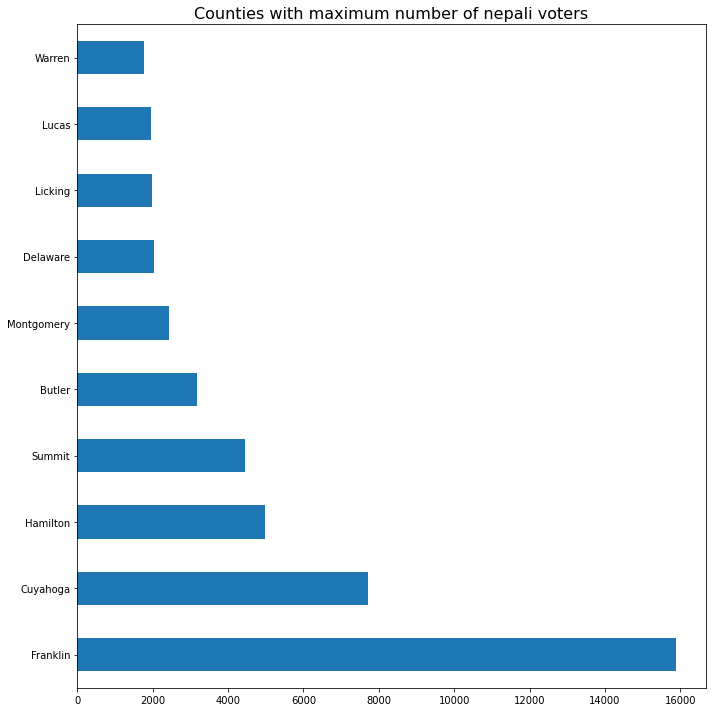

In [ ]:
plt.figure(figsize=(10, 10))
nep_voter_df['COUNTY_NAME'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh')
plt.title('Counties with maximum number of nepali voters', fontsize='16')
save_fig('spread_of_nepai_voters')
plt.show()

In [ ]:
nep_voter_df['PARTY_AFFILIATION'].unique()

array([nan, 'D', 'R', 'G', 'L'], dtype=object)

In [ ]:
plt.xticks?

Saving figure


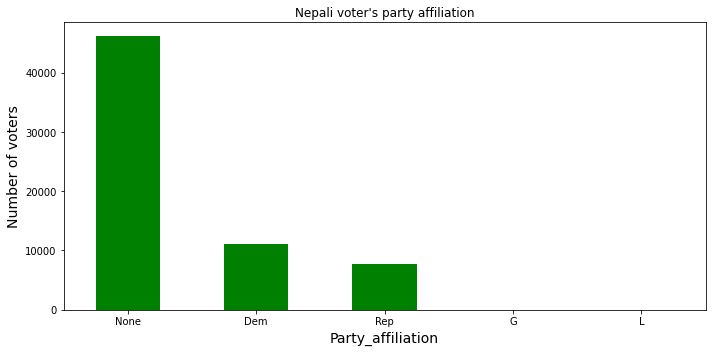

In [ ]:
plt.figure(figsize=(10, 5))
nep_voter_df['PARTY_AFFILIATION'].fillna(0).value_counts().plot(kind='bar', color='g')
plt.xlabel('Party_affiliation', fontsize=14)
plt.ylabel('Number of voters', fontsize=14)
plt.title("Nepali voter's party affiliation")
plt.xticks([0, 1, 2, 3, 4], ['None', 'Dem', 'Rep', 'G', 'L'], rotation=0)
plt.yticks(rotation=0)
save_fig('nepali_voters_party_affiliation')
plt.show()

# For visualizing the spread of Nepali voters in Ohio

In [ ]:
nep_voter_df['COUNTY_NAME'].unique()

array(['Tuscarawas', 'Logan', 'Jefferson', 'Lucas', 'Summit', 'Warren',
       'Washington', 'Richland', 'Fayette', 'Fairfield', 'Columbiana',
       'Clark', 'Ross', 'Wayne', 'Madison', 'Vinton', 'Stark', 'Jackson',
       'Trumbull', 'Lorain', 'Clermont', 'Clinton', 'Erie', 'Franklin',
       'Holmes', 'Highland', 'Hamilton', 'Pickaway', 'Ottawa', 'Mercer',
       'Meigs', 'Guernsey', 'Hocking', 'Huron', 'Medina', 'Miami',
       'Paulding', 'Perry', 'Belmont', 'Butler', 'Brown', 'Adams',
       'Auglaize', 'Defiance', 'Gallia', 'Cuyahoga', 'Champaign',
       'Coshocton', 'Greene', 'Knox', 'Licking', 'Wood', 'Scioto',
       'Seneca', 'Union', 'Crawford', 'Geauga', 'Carroll', 'Fulton',
       'Darke', 'Delaware', 'Van_Wert', 'Shelby', 'Sandusky', 'Williams',
       'Lawrence', 'Wyandot', 'Lake', 'Noble', 'Pike', 'Morrow',
       'Mahoning', 'Montgomery', 'Preble', 'Hancock', 'Henry', 'Monroe',
       'Putnam', 'Marion', 'Portage', 'Morgan', 'Muskingum', 'Harrison',
       'Hardin', 

In [ ]:
county_geographical_df = pd.DataFrame(nep_voter_df['COUNTY_NAME'].unique(), columns=['COUNTY_NAME'])

In [ ]:
county_geographical_df.set_index('COUNTY_NAME', inplace=True)

In [ ]:
county_geographical_df.head()

""
COUNTY_NAME
Tuscarawas
Logan
Jefferson
Lucas
Summit


In [ ]:
county_names = county_geographical_df.index.values

In [ ]:
# Adding a column for total population of each county
county_geographical_df['POPULATION'] = nep_voter_df['COUNTY_NAME'].value_counts()

## Adding party affiated population

In [ ]:
county_geographical_df['DEM'] = nep_voter_df[nep_voter_df['PARTY_AFFILIATION'] == 'D']['COUNTY_NAME'].value_counts()
county_geographical_df['REP'] = nep_voter_df[nep_voter_df['PARTY_AFFILIATION'] == 'R']['COUNTY_NAME'].value_counts()

In [ ]:
county_geographical_df.head()[:10]

,POPULATION,DEM,REP
COUNTY_NAME,,,
Tuscarawas,186,31,29
Logan,112,13,38
Jefferson,159,30,41
Lucas,1965,352,242
Summit,4442,807,314


Saving figure


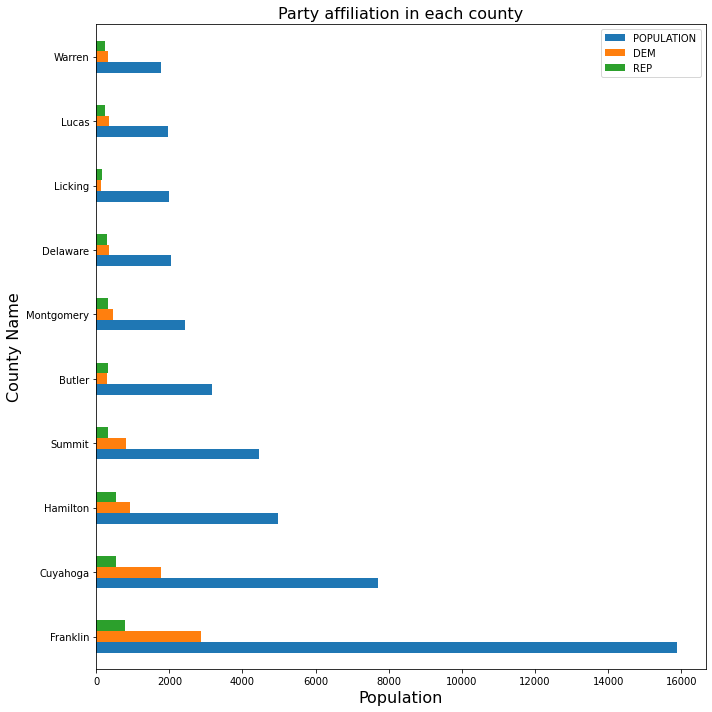

In [ ]:
county_geographical_df[['POPULATION', 'DEM', 'REP']].sort_values(ascending=False, by='POPULATION')[:10].plot(kind='barh', figsize=(10, 10))
plt.title('Party affiliation in each county', fontsize='16')
plt.xlabel('Population', fontsize=16)
plt.ylabel('County Name', fontsize=16)
save_fig('party_affiliation_in_each_county')
plt.show()


Pyramid

In [ ]:
import seaborn as sns

In [ ]:
pyramid_df = county_geographical_df.copy()

pyramid_df.reset_index(inplace=True)
pyramid_df['REP'] = -pyramid_df['REP'] 


In [ ]:
pyramid_df.sort_values(by=['DEM', 'REP'])['COUNTY_NAME'][-10:]

16         Stark
39        Butler
5         Warren
3          Lucas
60      Delaware
72    Montgomery
4         Summit
26      Hamilton
45      Cuyahoga
23      Franklin
Name: COUNTY_NAME, dtype: object

Saving figure


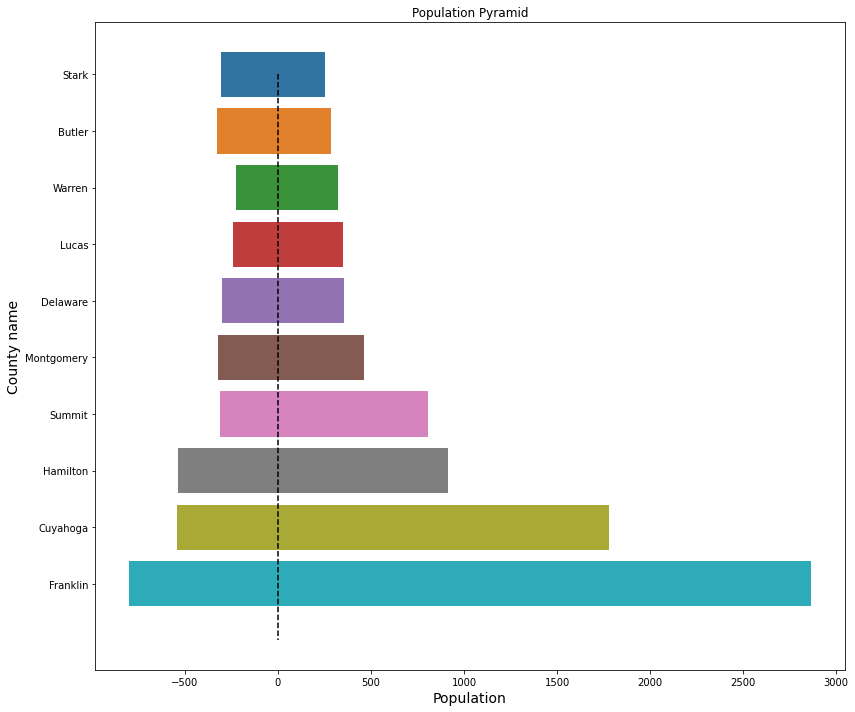

In [ ]:
county_name = pyramid_df.sort_values(by=['DEM', 'REP'])['COUNTY_NAME'][-10:]
plt.figure(figsize=(12, 10))
bar_plot = sns.barplot(x='DEM', y='COUNTY_NAME', data=pyramid_df, order=county_name)
bar_plot = sns.barplot(x='REP', y='COUNTY_NAME', data=pyramid_df, order=county_name)
bar_plot.set(xlabel="Population", ylabel="County name", title = "Population Pyramid")
plt.plot([0, 0], [0, 10], 'k--')
save_fig('population_pyramid_dem_rep')
plt.show()

In [ ]:
county_name

16         Stark
39        Butler
5         Warren
3          Lucas
60      Delaware
72    Montgomery
4         Summit
26      Hamilton
45      Cuyahoga
23      Franklin
Name: COUNTY_NAME, dtype: object

## Which county has the maximum Nepali population?

In [ ]:
county_geographical_df.iloc[county_geographical_df['POPULATION'].argmax()]

POPULATION    15873
DEM            2862
REP             799
Name: Franklin, dtype: int64

## For finding out lat and long of each county:

In [ ]:
lat_long_df = pd.read_csv('/content/drive/MyDrive/voter-analysis/zip_codes_states.csv', index_col='county')

In [ ]:
lat_long_df.head()

,zip_code,latitude,longitude,city,state
county,,,,,
Suffolk,501,40.922326,-72.637078,Holtsville,NY
Suffolk,544,40.922326,-72.637078,Holtsville,NY
Adjuntas,601,18.165273,-66.722583,Adjuntas,PR
Aguada,602,18.393103,-67.180953,Aguada,PR
Aguadilla,603,18.455913,-67.145780,Aguadilla,PR


In [ ]:
len(county_names)

88

In [ ]:
lat_long_df = lat_long_df[lat_long_df.index.isin(county_names)]

In [ ]:
lat_long_df.loc['Franklin', ['latitude', 'longitude']].mean()

latitude     39.966841
longitude   -83.267870
dtype: float64

In [ ]:
lat_long_df.index.size

8021

In [ ]:
lat_long_df = lat_long_df[['latitude', 'longitude']].groupby(lat_long_df.index).mean()

In [ ]:
lat_long_df.index.size

87

In [ ]:
county_geographical_df['LAT'], county_geographical_df['LNG'] = lat_long_df['latitude'], lat_long_df['longitude']

In [ ]:
county_geographical_df.head()

,POPULATION,DEM,REP,LAT,LNG
COUNTY_NAME,,,,,
Tuscarawas,186,31,29,40.481427,-81.464818
Logan,112,13,38,38.629236,-88.801315
Jefferson,159,30,41,37.284748,-88.997364
Lucas,1965,352,242,41.593168,-84.523342
Summit,4442,807,314,40.949723,-87.367017


In [ ]:
lat_long_df.loc['Montgomery']

latitude     37.864580
longitude   -82.696491
Name: Montgomery, dtype: float64

Saving figure


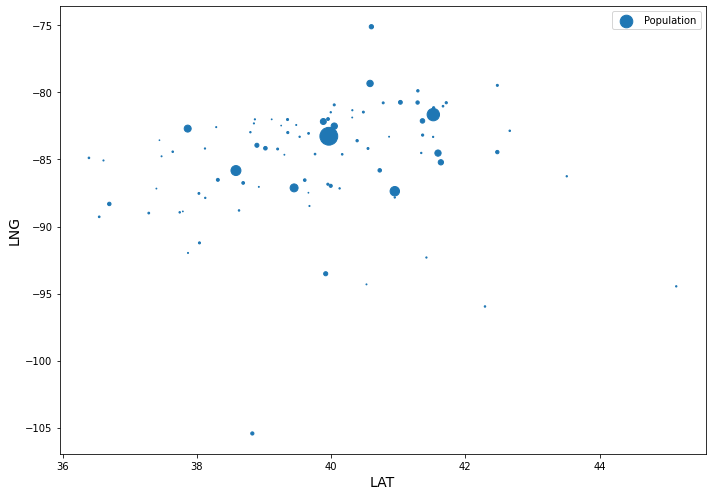

In [ ]:
county_geographical_df.plot(kind='scatter', x='LAT', y='LNG', s=county_geographical_df['POPULATION']/50,
                            label='Population', figsize=(10, 7))
save_fig('population_density_in_counties')
plt.show()

This didn't go *well*. 

---


I will try it using Basemap

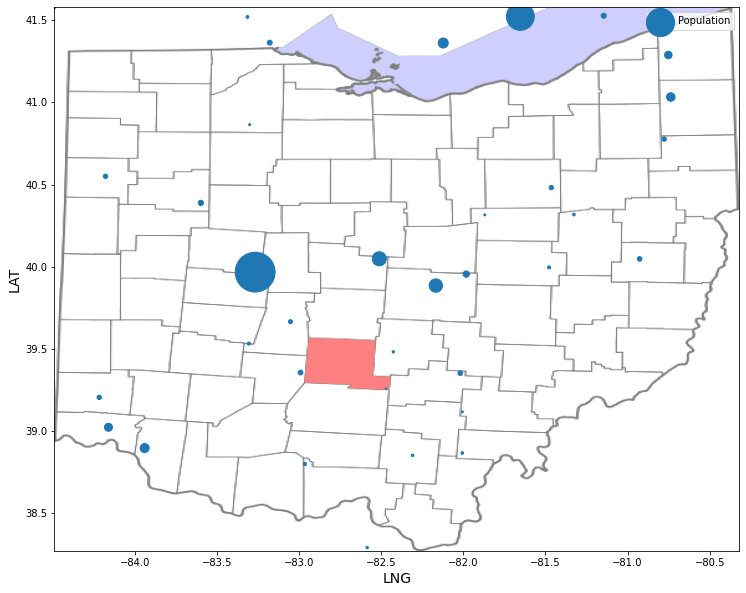

In [ ]:
import matplotlib.image as mpimg
ohio_img = mpimg.imread('/content/drive/MyDrive/voter-analysis/ohio_map.png')
county_geographical_df.plot(kind='scatter', x='LNG', y='LAT', s=county_geographical_df['POPULATION']/10,
                            label='Population', figsize=(14, 10))
plt.imshow(ohio_img, extent=[-84.49, -80.32, 38.27, 41.58], alpha=0.5)
plt.show()

In [ ]:
# Extract the data we're interested in
lat = county_geographical_df['LAT'].values
lon = county_geographical_df['LNG'].values
population = county_geographical_df['POPULATION'].values

In [ ]:
Basemap?
plt.scatter?

Saving figure


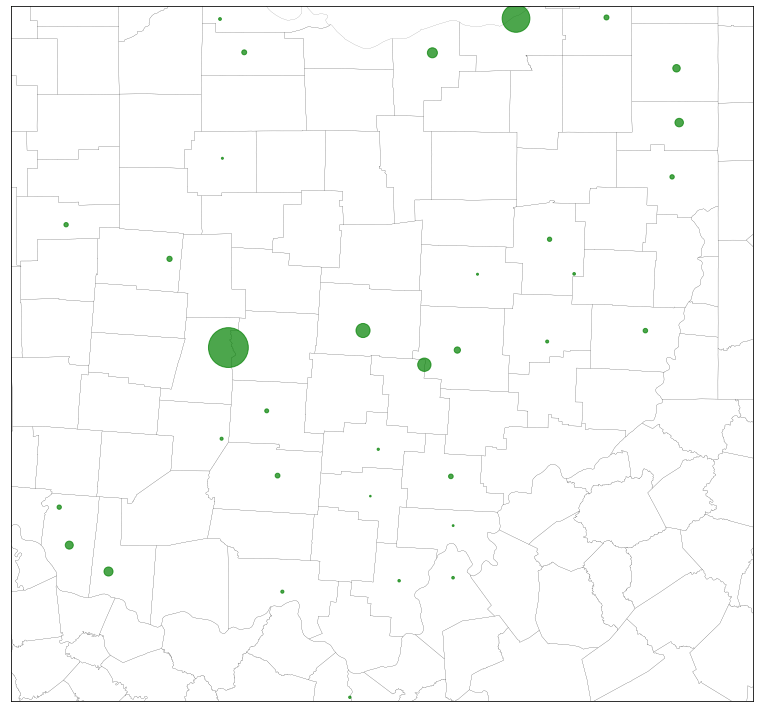

In [ ]:
# 1. Draw the map background
fig = plt.figure(figsize=(12, 10))
m = Basemap(projection='mill', resolution='c', llcrnrlat=38.27, urcrnrlat=41.58, llcrnrlon=-84.49, urcrnrlon=-80.32)

# m.shadedrelief()
# m.drawcoastlines(color='gray')
# m.drawcountries(color='gray')
m.drawcounties()

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          s=population/10, label='Population',
          alpha=0.7, c='g')
save_fig('spread_of_nepali_voters_in_ohio')
plt.show()

In [ ]:
 len(county_geographical_df.index.values)

88

In [ ]:
county_geographical_df.loc['Jefferson']

POPULATION    159.000000
DEM            30.000000
REP            41.000000
LAT            37.284748
LNG           -88.997364
Name: Jefferson, dtype: float64

In [ ]:
nep_voter_df.head()

,SOS_VOTERID,COUNTY_NUMBER,COUNTY_ID,LAST_NAME,FIRST_NAME,MIDDLE_NAME,SUFFIX,DATE_OF_BIRTH,REGISTRATION_DATE,VOTER_STATUS,PARTY_AFFILIATION,RESIDENTIAL_ADDRESS1,RESIDENTIAL_SECONDARY_ADDR,RESIDENTIAL_CITY,RESIDENTIAL_STATE,RESIDENTIAL_ZIP,RESIDENTIAL_ZIP_PLUS4,RESIDENTIAL_COUNTRY,RESIDENTIAL_POSTALCODE,MAILING_ADDRESS1,MAILING_SECONDARY_ADDRESS,MAILING_CITY,MAILING_STATE,MAILING_ZIP,MAILING_ZIP_PLUS4,MAILING_COUNTRY,MAILING_POSTAL_CODE,CAREER_CENTER,CITY,CITY_SCHOOL_DISTRICT,COUNTY_COURT_DISTRICT,CONGRESSIONAL_DISTRICT,COURT_OF_APPEALS,EDU_SERVICE_CENTER_DISTRICT,EXEMPTED_VILL_SCHOOL_DISTRICT,LIBRARY,LOCAL_SCHOOL_DISTRICT,MUNICIPAL_COURT_DISTRICT,PRECINCT_NAME,PRECINCT_CODE,...,GENERAL-11/18/2008,PRIMARY-05/05/2009,PRIMARY-09/08/2009,PRIMARY-09/15/2009,PRIMARY-09/29/2009,GENERAL-11/03/2009,PRIMARY-05/04/2010,PRIMARY-07/13/2010,PRIMARY-09/07/2010,GENERAL-11/02/2010,PRIMARY-05/03/2011,PRIMARY-09/13/2011,GENERAL-11/08/2011,PRIMARY-03/06/2012,GENERAL-11/06/2012,PRIMARY-05/07/2013,PRIMARY-09/10/2013,PRIMARY-10/01/2013,GENERAL-11/05/2013,PRIMARY-05/06/2014,GENERAL-11/04/2014,PRIMARY-05/05/2015,PRIMARY-09/15/2015,GENERAL-11/03/2015,PRIMARY-03/15/2016,GENERAL-06/07/2016,PRIMARY-09/13/2016,GENERAL-11/08/2016,PRIMARY-05/02/2017,PRIMARY-09/12/2017,GENERAL-11/07/2017,PRIMARY-05/08/2018,GENERAL-08/07/2018,GENERAL-11/06/2018,PRIMARY-05/07/2019,PRIMARY-09/10/2019,GENERAL-11/05/2019,PRIMARY-03/17/2020,GENERAL-11/03/2020,COUNTY_NAME
0,OH0023195569,79,105137698,GADAL,TITUS,NaN,NaN,1977-02-10,2015-07-09,CONFIRMATION,NaN,6867 SR 93 NW,NaN,DUNDEE,OH,44624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUCKEYE JVSD,NaN,NaN,NaN,7,5,EAST CENTRAL OH ESC,NaN,NaN,GARAWAY LOCAL SD (TUSC),NEW-PHILADELPHIA,PRECINCT WAYNE TOWNSHIP,79AEO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuscarawas
1,OH0021834383,79,105130437,GORE,BRYAN,J,NaN,1987-11-29,2012-07-05,ACTIVE,NaN,5632 HILLTOP DR NW,NaN,STRASBURG,OH,44680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUCKEYE JVSD,NaN,NaN,NaN,7,5,EAST CENTRAL OH ESC,NaN,NaN,STRASBURG-FRANKLIN LOCAL SD (TUSC),NEW-PHILADELPHIA,PRECINCT FRANKLIN TWP,79ACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuscarawas
2,OH0025546843,79,105148570,LEE,JAMIE,GALEN,NaN,1957-10-26,2020-04-08,ACTIVE,NaN,4033 TABOR RIDGE RD NE,APT A,MINERAL CITY,OH,44656.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUCKEYE JVSD,NaN,NaN,NaN,7,5,EAST CENTRAL OH ESC,NaN,NaN,TUSCARAWAS VALLEY LOCAL SD (TUSC),NEW-PHILADELPHIA,PRECINCT FAIRFIELD TWP,79ACI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuscarawas
3,OH0013262781,79,78000571,RAY,DEANNA,RAE,NaN,1940-03-10,1978-01-19,ACTIVE,D,105 KARNS DR,NaN,DOVER,OH,44622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUCKEYE JVSD,DOVER CITY,DOVER CITY SD,NaN,7,5,NaN,NaN,NaN,NaN,NEW-PHILADELPHIA,PRECINCT DOVER 1-C,79AAC,...,NaN,NaN,NaN,NaN,NaN,X,D,NaN,NaN,X,X,NaN,X,D,X,NaN,NaN,NaN,X,D,X,NaN,NaN,X,D,NaN,NaN,X,NaN,NaN,X,D,NaN,X,X,NaN,X,D,NaN,Tuscarawas
4,OH0021708375,79,105129769,DENNIS,ROBERT,S,NaN,1993-06-18,2012-02-21,ACTIVE,NaN,768 GARBERDALE SQ NE,APT D,BOLIVAR,OH,44612.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUCKEYE JVSD,NaN,NaN,NaN,7,5,EAST CENTRAL OH ESC,NaN,NaN,TUSCARAWAS VALLEY LOCAL SD (TUSC),NEW-PHILADELPHIA,PRECINCT LAWRENCE #1/ZOAR,79ACZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuscarawas


In [ ]:
from datetime import date, datetime
today = date.today()
today

datetime.date(2021, 6, 8)

In [ ]:
x = nep_voter_df.loc[0, 'DATE_OF_BIRTH']

In [ ]:
def calculateAge(birthDate):
    birthDate = datetime.strptime(birthDate, '%Y-%m-%d')
    today = date.today()
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day))
  
    return age

In [ ]:
calculateAge(x)

44

In [ ]:
nep_voter_df['AGE'] = nep_voter_df['DATE_OF_BIRTH'].map(lambda x: calculateAge(x))

In [ ]:
nep_voter_df.head()

,SOS_VOTERID,COUNTY_NUMBER,COUNTY_ID,LAST_NAME,FIRST_NAME,MIDDLE_NAME,SUFFIX,DATE_OF_BIRTH,REGISTRATION_DATE,VOTER_STATUS,PARTY_AFFILIATION,RESIDENTIAL_ADDRESS1,RESIDENTIAL_SECONDARY_ADDR,RESIDENTIAL_CITY,RESIDENTIAL_STATE,RESIDENTIAL_ZIP,RESIDENTIAL_ZIP_PLUS4,RESIDENTIAL_COUNTRY,RESIDENTIAL_POSTALCODE,MAILING_ADDRESS1,MAILING_SECONDARY_ADDRESS,MAILING_CITY,MAILING_STATE,MAILING_ZIP,MAILING_ZIP_PLUS4,MAILING_COUNTRY,MAILING_POSTAL_CODE,CAREER_CENTER,CITY,CITY_SCHOOL_DISTRICT,COUNTY_COURT_DISTRICT,CONGRESSIONAL_DISTRICT,COURT_OF_APPEALS,EDU_SERVICE_CENTER_DISTRICT,EXEMPTED_VILL_SCHOOL_DISTRICT,LIBRARY,LOCAL_SCHOOL_DISTRICT,MUNICIPAL_COURT_DISTRICT,PRECINCT_NAME,PRECINCT_CODE,...,PRIMARY-05/05/2009,PRIMARY-09/08/2009,PRIMARY-09/15/2009,PRIMARY-09/29/2009,GENERAL-11/03/2009,PRIMARY-05/04/2010,PRIMARY-07/13/2010,PRIMARY-09/07/2010,GENERAL-11/02/2010,PRIMARY-05/03/2011,PRIMARY-09/13/2011,GENERAL-11/08/2011,PRIMARY-03/06/2012,GENERAL-11/06/2012,PRIMARY-05/07/2013,PRIMARY-09/10/2013,PRIMARY-10/01/2013,GENERAL-11/05/2013,PRIMARY-05/06/2014,GENERAL-11/04/2014,PRIMARY-05/05/2015,PRIMARY-09/15/2015,GENERAL-11/03/2015,PRIMARY-03/15/2016,GENERAL-06/07/2016,PRIMARY-09/13/2016,GENERAL-11/08/2016,PRIMARY-05/02/2017,PRIMARY-09/12/2017,GENERAL-11/07/2017,PRIMARY-05/08/2018,GENERAL-08/07/2018,GENERAL-11/06/2018,PRIMARY-05/07/2019,PRIMARY-09/10/2019,GENERAL-11/05/2019,PRIMARY-03/17/2020,GENERAL-11/03/2020,COUNTY_NAME,AGE
0,OH0023195569,79,105137698,GADAL,TITUS,NaN,NaN,1977-02-10,2015-07-09,CONFIRMATION,NaN,6867 SR 93 NW,NaN,DUNDEE,OH,44624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUCKEYE JVSD,NaN,NaN,NaN,7,5,EAST CENTRAL OH ESC,NaN,NaN,GARAWAY LOCAL SD (TUSC),NEW-PHILADELPHIA,PRECINCT WAYNE TOWNSHIP,79AEO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuscarawas,44
1,OH0021834383,79,105130437,GORE,BRYAN,J,NaN,1987-11-29,2012-07-05,ACTIVE,NaN,5632 HILLTOP DR NW,NaN,STRASBURG,OH,44680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUCKEYE JVSD,NaN,NaN,NaN,7,5,EAST CENTRAL OH ESC,NaN,NaN,STRASBURG-FRANKLIN LOCAL SD (TUSC),NEW-PHILADELPHIA,PRECINCT FRANKLIN TWP,79ACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuscarawas,33
2,OH0025546843,79,105148570,LEE,JAMIE,GALEN,NaN,1957-10-26,2020-04-08,ACTIVE,NaN,4033 TABOR RIDGE RD NE,APT A,MINERAL CITY,OH,44656.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUCKEYE JVSD,NaN,NaN,NaN,7,5,EAST CENTRAL OH ESC,NaN,NaN,TUSCARAWAS VALLEY LOCAL SD (TUSC),NEW-PHILADELPHIA,PRECINCT FAIRFIELD TWP,79ACI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuscarawas,63
3,OH0013262781,79,78000571,RAY,DEANNA,RAE,NaN,1940-03-10,1978-01-19,ACTIVE,D,105 KARNS DR,NaN,DOVER,OH,44622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUCKEYE JVSD,DOVER CITY,DOVER CITY SD,NaN,7,5,NaN,NaN,NaN,NaN,NEW-PHILADELPHIA,PRECINCT DOVER 1-C,79AAC,...,NaN,NaN,NaN,NaN,X,D,NaN,NaN,X,X,NaN,X,D,X,NaN,NaN,NaN,X,D,X,NaN,NaN,X,D,NaN,NaN,X,NaN,NaN,X,D,NaN,X,X,NaN,X,D,NaN,Tuscarawas,81
4,OH0021708375,79,105129769,DENNIS,ROBERT,S,NaN,1993-06-18,2012-02-21,ACTIVE,NaN,768 GARBERDALE SQ NE,APT D,BOLIVAR,OH,44612.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUCKEYE JVSD,NaN,NaN,NaN,7,5,EAST CENTRAL OH ESC,NaN,NaN,TUSCARAWAS VALLEY LOCAL SD (TUSC),NEW-PHILADELPHIA,PRECINCT LAWRENCE #1/ZOAR,79ACZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuscarawas,27


In [ ]:
nep_voter_df[['AGE']].describe()

,AGE
count,64870.000000
mean,46.622507
std,17.899705
min,18.000000
25%,32.000000
50%,44.000000
75%,60.000000
max,221.000000


How is this possible?

In [ ]:
nep_voter_df['AGE'].argmax()

968

In [ ]:
nep_voter_df.loc[968, 'DATE_OF_BIRTH']

'1800-01-01'

In [ ]:
surnames_series[surnames_series.isin(['DENNIS'])]

712    DENNIS
Name: surnames, dtype: object

Removing Outliers

In [ ]:
nep_voter_df = nep_voter_df[nep_voter_df['AGE'] < 110]

## Pyramid on voter's affiliation grouped by Age

In [ ]:
nep_voter_df[nep_voter_df['PARTY_AFFILIATION'] == 'D']['AGE'].value_counts().sort_index()

18      9
19     72
20     87
21     84
22     77
       ..
97      4
98      1
99      1
101     3
104     1
Name: AGE, Length: 84, dtype: int64

In [ ]:
dem_supporters_age = nep_voter_df[nep_voter_df['PARTY_AFFILIATION'] == 'D']['AGE'].value_counts().sort_index()
rep_supporters_age = nep_voter_df[nep_voter_df['PARTY_AFFILIATION'] == 'R']['AGE'].value_counts().sort_index()

In [ ]:
by_age = pd.DataFrame(data={'dem': dem_supporters_age, 'rep': rep_supporters_age})
by_age.reset_index(inplace=True)
by_age = by_age.rename(columns={'index': 'age', 'dem': 'dem', 'rep': 'rep'})

In [ ]:
bins = [17, 25, 35, 60, 105]
labels = ['18-25', '26-35', '36-60', '60-105']
by_age['AgeGroup'] = pd.cut(by_age['age'], bins=bins, labels=labels, right=True)
by_age.head()

,age,dem,rep,AgeGroup
0,18,9.0,1.0,18-25
1,19,72.0,18.0,18-25
2,20,87.0,18.0,18-25
3,21,84.0,25.0,18-25
4,22,77.0,21.0,18-25


In [ ]:
by_age = by_age.groupby('AgeGroup').sum()[['dem', 'rep']]
by_age.reset_index(inplace=True)
by_age['rep'] = -by_age['rep']
by_age.head()

,AgeGroup,dem,rep
0,18-25,747.0,-232.0
1,26-35,1555.0,-562.0
2,36-60,4614.0,-3369.0
3,60-105,4090.0,-3487.0


Saving figure


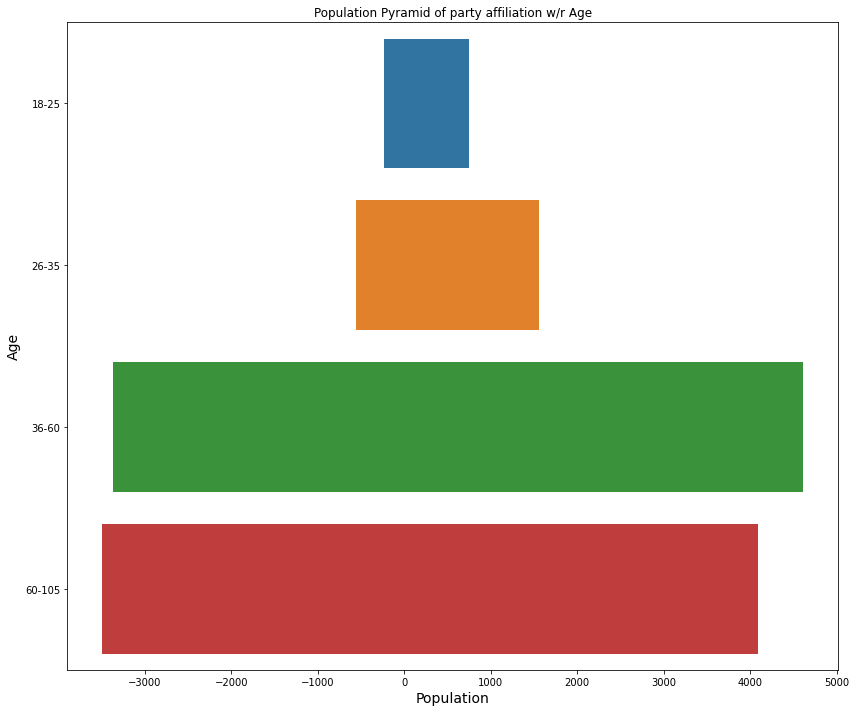

In [ ]:
labels = ['18-25', '26-35', '36-60', '60-105']
plt.figure(figsize=(12, 10))
bar_plot2 = sns.barplot(x='dem', y='AgeGroup', data=by_age, order=labels)
bar_plot2 = sns.barplot(x='rep', y='AgeGroup', data=by_age, order=labels)
bar_plot2.set(xlabel="Population", ylabel="Age", title = "Population Pyramid of party affiliation w/r Age")
save_fig('population_pyramid_of_party_affiliation')
plt.show()